In [1]:
import pickle
from datetime import datetime
import statistics
import matplotlib.pyplot as plt

def time_difference(start_time, end_time):
    fmt = "%H:%M:%S.%f"
    tdelta = datetime.strptime(end_time, fmt) - datetime.strptime(start_time, fmt)
    return tdelta.total_seconds() 

def get_statistics(filename):
    round_trip_latency = list()
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
        for d in data:
            delta = time_difference(d['client_send_time'], d['server_start_time'])
            delta2 = time_difference(d['server_end_time'], d['client_end_time'])
            
            latency = delta2 + delta
            round_trip_latency.append(latency)
     
    average_round_trip_latency = sum(round_trip_latency) / len(round_trip_latency)
    standard_deviation = statistics.stdev(round_trip_latency)
    return round_trip_latency, average_round_trip_latency, standard_deviation

def get_offset_delay(filename):
    offset = list()
    delay = list()
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
        for d in data:
            delta = time_difference(d['client_send_time'], d['server_start_time'])
            delta2 = time_difference(d['server_end_time'], d['client_end_time'])
            offset.append((delta + delta2) / 2)
            de = time_difference(d['client_send_time'], d['client_end_time'])
            de2 = time_difference(d['server_start_time'], d['server_start_time'])
            delay.append(de-de2)
     
    return offset, delay

def clock_synchronize(filename):
    server_time = list()
    fmt = "%H:%M:%S.%f"
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
        for d in data:
            delta = datetime.strptime(d["client_end_time"], fmt)  - datetime.strptime(d["client_send_time"], fmt)
            delta = delta/2
            server_time_estimate = datetime.strptime(d["server_start_time"], fmt) + delta
            server_time.append(server_time_estimate.strftime("%H:%M:%S.%f")[:-3])
    
    return server_time, data

def plot_latency(round_trip_latency):
    length = len(round_trip_latency)
    fig = plt.figure()
    fig.suptitle("Measurement Number vs Latency")
    ax = plt.axes()

    x = np.linspace(0, 120, length)
    ax.plot(x, round_trip_latency)
    ax.set_xlabel("Measurement Number")
    ax.set_ylabel("Latency in seconds")
    plt.plot(round_trip_latency, 'r+')
    
def plot_offset(offset):
    length = len(offset)
    fig = plt.figure()
    fig.suptitle("Measurement Number vs Offset")
    ax = plt.axes()

    x = np.linspace(0, 120, length)
    ax.plot(x, offset)
    ax.set_xlabel("Measurement Number")
    ax.set_ylabel("Offset in seconds")
    plt.plot(offset, 'r+')

def plot_delay(delay):
    length = len(delay)
    fig = plt.figure()
    fig.suptitle("Measurement Number vs Delay")
    ax = plt.axes()

    x = np.linspace(0, 120, length)
    ax.plot(x, delay)
    ax.set_xlabel("Measurement Number")
    ax.set_ylabel("Delay in seconds")
    plt.plot(delay, 'r+')
    
def christian_time_difference(local_clock, server_estimate):
    time_diff = [time_difference(x, y) for x,y in zip(local_clock, server_estimate)]
    
    length = len(delay)
    fig = plt.figure()
    fig.suptitle("Measurement Number vs Time difference of local clock and server estimate")
    ax = plt.axes()

    x = np.linspace(0, 120, length)
    ax.plot(x, delay)
    ax.set_xlabel("Measurement Number")
    ax.set_ylabel("Difference in seconds")
    plt.plot(delay, 'r+')

Statistics for client and server running in different geographical locations!!!
First 10 rounds of Round trip Latencies:  [0.424, 0.211, 0.213, 0.213, 0.212, 0.213, 0.212, 0.213, 0.211, 0.213]
Average Round Trip Latency:  0.21530833333333316
Standard Deviation:  0.019296795498906304
Offset:  0.10765416666666658
Delay:  1.2167166666666644
Server time estimate:  ['23:55:26.110']
Local clock time:  23:55:25.079


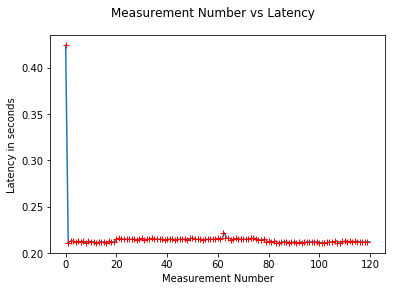

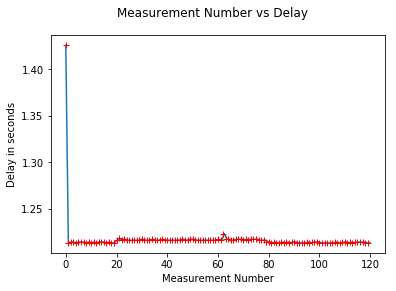

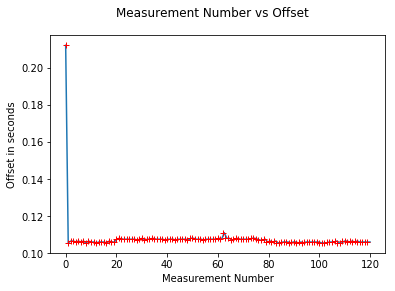

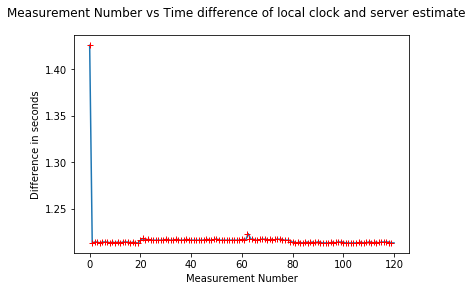

In [8]:
# Round Trip Latencies for geographically distributed instances
round_trip_latency, average_round_trip_latency, standard_deviation = get_statistics('geographical.pickle')
offset, delay = get_offset_delay('geographical.pickle')
server_time_estimate, data = clock_synchronize('geographical.pickle')
print('Statistics for client and server running in different geographical locations!!!')
print('First 10 rounds of Round trip Latencies: ', round_trip_latency[:10])
print('Average Round Trip Latency: ', average_round_trip_latency)
print('Standard Deviation: ', standard_deviation)
print('Offset: ', sum(offset)/len(offset))
print('Delay: ', sum(delay)/ len(delay))
print('Server time estimate: ', server_time_estimate[:1])
local_clock = [d["client_send_time"] for d in data]
print('Local clock time: ', data[0]["client_send_time"])
plot_latency(round_trip_latency)
plot_delay(delay)
plot_offset(offset)
christian_time_difference(local_clock, server_time_estimate)


Statistics for client and server running on different machines in the same VPC!!!
First 10 rounds of Round trip Latencies:  [0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.003, 0.004, 0.003]
Average Round Trip Latency:  0.0028583333333333356
Standard Deviation:  0.00058404318554113
Offset:  0.0014291666666666678
Delay:  1.004225000000001
Server time estimate:  ['23:56:36.244']
Local clock time:  23:56:35.739


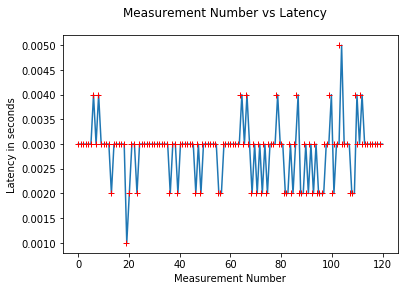

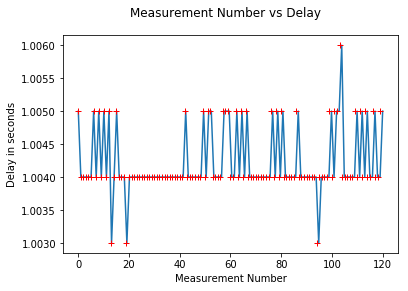

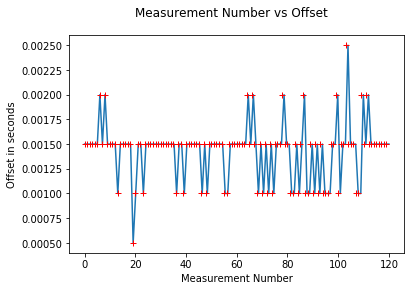

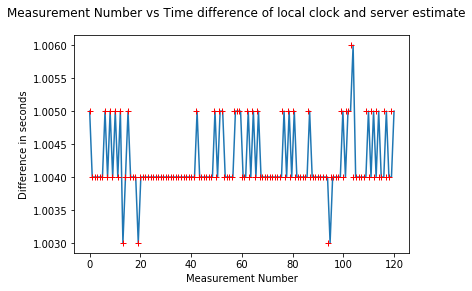

In [4]:
round_trip_latency_vpc, average_round_trip_latency_vpc, standard_deviation_vpc = get_statistics('different_machines.pickle')
offset, delay = get_offset_delay('different_machines.pickle')
server_time_estimate, data = clock_synchronize('different_machines.pickle')

print('Statistics for client and server running on different machines in the same VPC!!!')
print('First 10 rounds of Round trip Latencies: ', round_trip_latency_vpc[:10])
print('Average Round Trip Latency: ', average_round_trip_latency_vpc)
print('Standard Deviation: ', standard_deviation_vpc)
print('Offset: ', sum(offset)/len(offset))
print('Delay: ', sum(delay)/ len(delay))
print('Server time estimate: ', server_time_estimate[:1])
local_clock = [d["client_send_time"] for d in data]
print('Local clock time: ', data[0]["client_send_time"])
plot_latency(round_trip_latency_vpc)
plot_delay(delay)
plot_offset(offset)
christian_time_difference(local_clock, server_time_estimate)

Statistics for client and server running on different machines in the same VPC!!!
First 10 rounds of Round trip Latencies:  [0.003, 0.002, 0.003, 0.002, 0.001, 0.002, 0.002, 0.001, 0.002, 0.0]
Average Round Trip Latency:  0.001891666666666668
Standard Deviation:  0.0008178248804077837
Offset:  0.000945833333333334
Delay:  1.0050916666666672
Server time estimate:  ['00:44:59.077']
Local clock time:  00:44:58.573


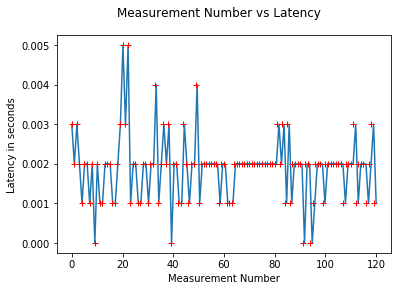

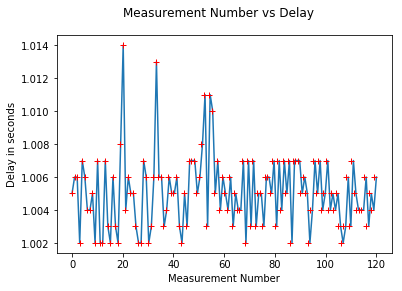

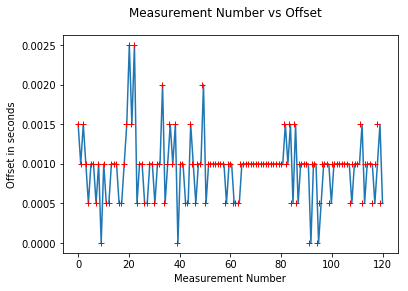

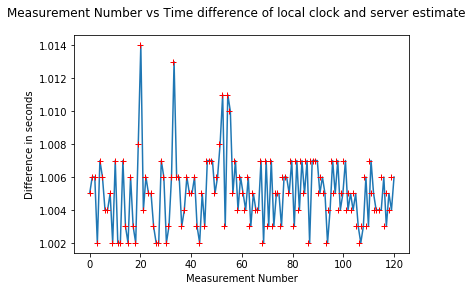

In [5]:
round_trip_latency, average_round_trip_latency, standard_deviation = get_statistics('same_machine.pickle')
offset, delay = get_offset_delay('same_machine.pickle')
server_time_estimate, data = clock_synchronize('same_machine.pickle')

print('Statistics for client and server running on different machines in the same VPC!!!')
print('First 10 rounds of Round trip Latencies: ', round_trip_latency[:10])
print('Average Round Trip Latency: ', average_round_trip_latency)
print('Standard Deviation: ', standard_deviation)
print('Offset: ', sum(offset)/len(offset))
print('Delay: ', sum(delay)/ len(delay))
print('Server time estimate: ', server_time_estimate[:1])
local_clock = [d["client_send_time"] for d in data]
print('Local clock time: ', data[0]["client_send_time"])
plot_latency(round_trip_latency)
plot_delay(delay)
plot_offset(offset)
christian_time_difference(local_clock, server_time_estimate)